In [265]:
import os
try:                  # get to root of project
    print(od)
except NameError:
    od = os.getcwd()
    
os.chdir(od + '/..')
print(os.getcwd())

/home/mike/py/mylib/ChemCupid/nb
/home/mike/py/mylib/ChemCupid


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams, plot, scatter

In [2]:
import os
import numpy as np
import pandas as pd
import glob as glob
import bs4 as bs
import json
import re

import pubchempy as pc

from collections import Hashable
from hashlib import md5

import tqdm


In [3]:
import cachegrab as cg
from cachegrab.cachers.basic import BasicCachingGetter as BCG

In [4]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [5]:
basedir = '/home/mike/data/chemistry/compatibility/parsed/'
files = glob.glob(basedir + '*.csv')
files

['/home/mike/data/chemistry/compatibility/parsed/Graco_ChemCompGuidecsv.csv',
 '/home/mike/data/chemistry/compatibility/parsed/ColeParmerRaw02.csv',
 '/home/mike/data/chemistry/compatibility/parsed/tabula-Chemical-Resistance-Chart.csv']

In [6]:
frames = [pd.read_csv(fn) for fn in files]

In [7]:
frames[0].head()

,chemical,Aluminum,Carbon Steel,Cast/Ductile Iron,304 Stainless Steel,316 Stainless Steel,Acetal,Buna,CSM (Hypalon),"EPR, EPDM",...,Fluoroelastomer (FKM),Nitrile (TPE),Nylon,Polychloroprene,Polypropylene,PTFE,PVDF,Santoprene (EPDM & Polypropylene),UHMWPE,Urethane
0,Acetaldehyde,B,D,C,A,A,A,D,C,A,...,D,D,B,D,C,A,D,B,B,D
1,Acetamide,A,D,D,D,A,A,B,B,A,...,B,A,B,B,A,A,D,A,A,D
2,Acetate Solvents,B,D,D,D,A,A,D,C,B,...,D,D,A,D,D,A,D,B,B,D
3,Acetic Acid,B,D,D,D,B,D,C,C,A,...,C,C,D,C,B,A,C,C,B,C
4,Acetic Acid — 20%,B,D,D,B,A,C,C,A,A,...,B,-,D,B,B,A,B,B,A,-


In [8]:
frames[1].head().replace({np.nan: '-'})

,chemical,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,...,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene
0,Acetaldehyde,C,D,C,A,A,D,D,A,D,...,A,A,A,A,-,A,A,D,C,A
1,Acetamide,B,D,A,A,-,B,-,A,-,...,A,A,A,A,-,D,B,D,B,A
2,Acetate Solvent,C,D,A,C,-,D,-,A,C,...,A,-,A,A,-,C,C,D,D,B
3,Acetic Acid,C,D,A,C,A,B,D,A,C,...,A,D,A,B,A,C,C,D,C,B
4,Acetic Acid 20%,A,D,A,A,A,B,C,A,A,...,A,C,A,A,A,C,B,D,A,A


In [9]:
frames[2].head()

,chemical,302 Stainless Steel,304 Stainless Steel,316 Stainless Steel,440 Stainless Steel,Aluminum,Titanium,Hastelloy C,Cast Bronze,Brass,...,Carbon,Ceramic,Ceramagnet A,Viton,Buna-N (Nitrile),Silicon,Neoprene,EPDM,Natural rubber,Epoxy
0,Acetaldehyde 5,A,A,A,-,B,A,A,D,-,...,A,A,-,D,B,B,D,B,C,A
1,Acetamide,-,B,A,-,-,-,-,-,-,...,-,A,-,A,A,-,A,A,D,A
2,Acetate Solv. 2,A,B,A,B,B,-,-,A,C,...,A,A,-,D,D,-,D,-,-,A
3,"Acetic Acid, Glacia 1",-,B,A,A,B,A,A,C,C,...,A,A,-,D,D,B,C,B,C,B
4,Acetic Acid 20%,-,B,A,-,-,A,A,-,C,...,-,A,-,A,C,-,C,-,-,B


In [10]:
pc.get_compounds('Aspirin', 'name')

[Compound(2244)]

In [11]:
resp = pc.get_compounds('Acetaldehyde', 'name')
print(resp, type(resp))

[Compound(177)] <class 'list'>


In [12]:
c = resp[0]
type(c)

pubchempy.Compound

In [247]:
def first(lst):
    try:
        return lst[0]
    except IndexError:
        return None

def pc_get_by_name_as_dict(name):
    resp = pc.get_compounds(name, 'name')
    return [x.to_dict() for x in resp]

def search_for_cid(name):
    """Search for a compound by name. Return only CIDs"""
    resp = pc.get_compounds(name, 'name')
    if resp:
        try:
            return({name: [{'cid': x.cid} for x in resp]})
        except TypeError:
            return {}
    return {}

def extr_props(comp, propName):
    props = []
    for prop in comp['props']:
        if prop['urn']['label'] == propName:
            props.append(prop)
    return props

def extr_cids(compounds):
    if compounds is None:
        return None
    if compounds == []:
        return []
    cids = [c['id']['id']['cid'] for c in compounds]
    return cids

def extr_cid(comp):
    return comp['id']['id']['cid']
    
def extr_iupac(comp):
    return first(extr_props(comp, 'IUPAC Name'))['value']['sval']
    

In [195]:
c = search_for_cid('ethanol')
c

{'ethanol': [{'cid': 702}]}

In [196]:
json.dumps(c)

'{"ethanol": [{"cid": 702}]}'

In [197]:
bcg = BCG()

In [198]:
def hash_md5(stringable, strict=True):
    if strict and not isinstance(stringable, Hashable):
        raise TypeError('Argument of type {} is not hashable. '
                        'Use a hashable object, or set strict=False'.format(type(stringable)))
    
    md5_key = md5(str(stringable).encode()).hexdigest()
    return md5_key

cfg = {'identifier': 'Acetaldehyde', 'namespace': 'name'}
hash_md5(cfg, False)

'821bb812b8c28827937278b6dd3ea517'

In [199]:
# cfg = {'name': 'Aspirin'}
# getfn(search_for_cid, kwargs=cfg)
def get_record(comp):
    return comp._record

@cg.BasicCachingGetter()
def get_compounds(identifier, namespace='name'):
    if not identifier:
        return []
    try:
        res = pc.get_compounds(identifier, namespace=namespace)
    except Exception as e:
        print("Borked during pubchempy.get_compounds")
        print("namespace: [{}] id: [{}]".format(namespace, identifier))
        raise
    return [get_record(comp) for comp in res]

In [224]:
def getfn(fn, kwargs, flush=False, namestr=None, basepath='./cache/'):
    """Wraps requests.get(), saves the response as a json file.
    :param url: Target URL
    :param flush: Refresh cache by forcing a request
    :return:
    """

    namestr = namestr if namestr is not None else fn.__doc__
    namestr += str(kwargs) # this hackitude is over 9000! filthy, but fast and works for this purpose
    cachePath = "{}/{}.json".format(basepath, hash_md5(namestr))

    # Try to extract the file. If it fails, fall through
    data = None
    if os.path.exists(cachePath) and not flush:
        with open(cachePath, 'r') as f:
            try:
                data = json.load(f)
            except ValueError:
                pass

    if data is None:
        data = fn(**kwargs)
        with open(cachePath, 'w') as f:
            json.dump(data, f)

    return data

def cached_search_for_cid_old(name):
    cfg = {'name': name}
    try:
        resp = getfn(search_for_cid, namestr='search_for_cid', kwargs=cfg)
    except TypeError:
        resp = None
        
    if resp:
        return str(resp[name][0]['cid'])
    
def cached_search_for_cid(name):
    comp = get_compounds(name.lower(), 'name')
    cid = first(extr_cid(comp))
    return cid

In [206]:
c = get_compounds('Aspirin', 'name')
print(type(c))
c[0].keys()

<class 'list'>


dict_keys(['props', 'id', 'charge', 'bonds', 'atoms', 'count', 'coords'])

In [202]:
c[0]['id']['id']['cid']

2244

In [215]:
c[0]['props'][5]['urn']['label']

'Fingerprint'

In [217]:
[prop['urn']['label'] for prop in first(c)['props']]

['Compound',
 'Compound Complexity',
 'Count',
 'Count',
 'Count',
 'Fingerprint',
 'IUPAC Name',
 'IUPAC Name',
 'IUPAC Name',
 'IUPAC Name',
 'IUPAC Name',
 'InChI',
 'InChIKey',
 'Log P',
 'Mass',
 'Molecular Formula',
 'Molecular Weight',
 'SMILES',
 'SMILES',
 'Topological',
 'Weight']

In [232]:
extr_iupac(first(c))

'2-acetoxybenzoic acid'

In [252]:
def query_essential(compoundName):
    """extract only a few key items from the json"""
    queryName = compoundName.lower()
    compounds = get_compounds(queryName, 'name')

    if not compounds:
        return None
    comp = first(compounds)
    cid = extr_cid(comp)
    iupac = extr_iupac(comp)
    return {'name': queryName, 'iupacName': iupac, 'cid': cid}
    
compoundName = 'AsPirIn'
queryName = compoundName.lower()
compounds = get_compounds(queryName, 'name')
# print(len(compounds))
query_essential(compoundName)


{'cid': 2244, 'iupacName': '2-acetoxybenzoic acid', 'name': 'aspirin'}

In [251]:
query_essential('fobar')

In [248]:
c = first(compounds)
c['id']['id']['cid']

2244

In [24]:
c

[{'atoms': {'aid': [1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21],
   'element': [8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1]},
  'bonds': {'aid1': [1,
    1,
    2,
    2,
    3,
    4,
    5,
    5,
    6,
    6,
    7,
    7,
    8,
    8,
    9,
    9,
    10,
    12,
    13,
    13,
    13],
   'aid2': [5,
    12,
    11,
    21,
    11,
    12,
    6,
    7,
    8,
    11,
    9,
    14,
    10,
    15,
    10,
    16,
    17,
    13,
    18,
    19,
    20],
   'order': [1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]},
  'charge': 0,
  'coords': [{'aid': [1,
     2,
     3,
     4,
     5,
     6,
     7,
     8,
     9,
     10,
     11,
     12,
     13,
     14,
     15,
     16,
     17,
     18,
     19,
     20,
     21],
    'conformers': [{'style': {'aid1': [5, 5, 6, 7, 8, 9],
       'aid2': [6, 7, 8, 9, 10, 10],
       'annotati

In [25]:
# pc.get_substances('Acetaldehyde', 'name') # slow

In [26]:
c = pc.Compound.from_cid(177)
c

Compound(177)

In [27]:
test = frames[1]['chemical'].head(30)
[n for n in test]

['Acetaldehyde',
 'Acetamide',
 'Acetate Solvent',
 'Acetic Acid',
 'Acetic Acid 20%',
 'Acetic Acid 80%',
 'Acetic Acid, Glacial',
 'Acetic Anhydride',
 'Acetone',
 'Acetyl Bromide',
 'Acetyl Chloride (dry)',
 'Acetylene',
 'Acrylonitrile',
 'Adipic Acid',
 'Alcohols:Amyl',
 'Alcohols:Benzyl',
 'Alcohols:Butyl',
 'Alcohols:Diacetone',
 'Alcohols:Ethyl',
 'Alcohols:Hexyl',
 'Alcohols:Isobutyl',
 'Alcohols:Isopropyl',
 'Alcohols:Methyl',
 'Alcohols:Octyl',
 'Alcohols:Propyl',
 'Aluminum Chloride',
 'Aluminum Chloride 20%',
 'Aluminum Fluoride',
 'Aluminum Hydroxide',
 'Aluminum Nitrate']

In [253]:
for name in test:
    try:
        c = first(get_compounds(name, 'name'))
        cid = extr_cid(c)
    except TypeError:
        print('{} - FAILED'.format(name))
    print(name, cid)

acetaldehyde 177
acetamide 178
acetate solvent - FAILED
acetate solvent 178
acetic acid 176
acetic acid 20% - FAILED
acetic acid 20% 176
acetic acid 80% - FAILED
acetic acid 80% 176
acetic acid, glacial 176
acetic anhydride 7918
acetone 180
acetyl bromide 10482
acetyl chloride (dry) - FAILED
acetyl chloride (dry) 10482
acetylene 6326
acrylonitrile 7855
adipic acid 196
amyl alcohol 6276
benzyl alcohol 244
butyl alcohol 263
diacetone alcohol 31256
ethyl alcohol 702
hexyl alcohol 8103
isobutyl alcohol 6560
isopropyl alcohol 3776
methyl alcohol 887
octyl alcohol 957
propyl alcohol 1031
aluminum chloride - FAILED
aluminum chloride 1031
aluminum chloride 20% - FAILED
aluminum chloride 20% 1031
aluminum fluoride 2124
aluminum hydroxide - FAILED
aluminum hydroxide 2124
aluminum nitrate - FAILED
aluminum nitrate 2124


In [254]:
for name in test:
    print(name, query_essential(name))

acetaldehyde {'name': 'acetaldehyde', 'cid': 177, 'iupacName': 'acetaldehyde'}
acetamide {'name': 'acetamide', 'cid': 178, 'iupacName': 'acetamide'}
acetate solvent None
acetic acid {'name': 'acetic acid', 'cid': 176, 'iupacName': 'acetic acid'}
acetic acid 20% None
acetic acid 80% None
acetic acid, glacial {'name': 'acetic acid, glacial', 'cid': 176, 'iupacName': 'acetic acid'}
acetic anhydride {'name': 'acetic anhydride', 'cid': 7918, 'iupacName': 'acetyl acetate'}
acetone {'name': 'acetone', 'cid': 180, 'iupacName': 'acetone'}
acetyl bromide {'name': 'acetyl bromide', 'cid': 10482, 'iupacName': 'acetyl bromide'}
acetyl chloride (dry) None
acetylene {'name': 'acetylene', 'cid': 6326, 'iupacName': 'acetylene'}
acrylonitrile {'name': 'acrylonitrile', 'cid': 7855, 'iupacName': 'prop-2-enenitrile'}
adipic acid {'name': 'adipic acid', 'cid': 196, 'iupacName': 'adipic acid'}
amyl alcohol {'name': 'amyl alcohol', 'cid': 6276, 'iupacName': 'pentan-1-ol'}
benzyl alcohol {'name': 'benzyl alcoh

In [263]:
query_essential('ammonia 10%')

In [29]:
pc.get_compounds('Amyl alcohol', 'name')

[Compound(6276)]

In [30]:
pc.get_compounds('alcohol, Amyl', 'name')

[]

In [31]:
# The Cole Parmer dataset using the backwards alcohol names, so we have to convert to something closer to iupac name
pat_alc = r'(?P<alc>Alcohol)s? ?: ?(?P<name>\w+)'
s = "Alcohol:Hexyl "
m = re.search(pat_alc, s)
m.groupdict()

{'alc': 'Alcohol', 'name': 'Hexyl'}

In [32]:
cached_search_for_cid('Methyl alcohol')

'887'

In [33]:
repl_alc = lambda m: m.groupdict()['name'] + ' alcohol'
test2 = test.str.replace(pat_alc, repl_alc)

In [34]:
# check alcohol regex effects
test2

0              Acetaldehyde
1                 Acetamide
2           Acetate Solvent
3               Acetic Acid
4           Acetic Acid 20%
5           Acetic Acid 80%
6      Acetic Acid, Glacial
7          Acetic Anhydride
8                   Acetone
9            Acetyl Bromide
10    Acetyl Chloride (dry)
11                Acetylene
12            Acrylonitrile
13              Adipic Acid
14             Amyl alcohol
15           Benzyl alcohol
16            Butyl alcohol
17        Diacetone alcohol
18            Ethyl alcohol
19            Hexyl alcohol
20         Isobutyl alcohol
21        Isopropyl alcohol
22           Methyl alcohol
23            Octyl alcohol
24           Propyl alcohol
25        Aluminum Chloride
26    Aluminum Chloride 20%
27        Aluminum Fluoride
28       Aluminum Hydroxide
29         Aluminum Nitrate
Name: chemical, dtype: object

In [176]:
for n in test2:
    c = cached_search_for_cid(n)
    print(n, c)

Acetaldehyde 177
Acetamide 178
Acetate Solvent None
Acetic Acid 176
Acetic Acid 20% None
Acetic Acid 80% None
Acetic Acid, Glacial 176
Acetic Anhydride 7918
Acetone 180
Acetyl Bromide 10482
Acetyl Chloride (dry) None
Acetylene 6326
Acrylonitrile 7855
Adipic Acid 196
Amyl alcohol 6276
Benzyl alcohol 244
Butyl alcohol 263
Diacetone alcohol 31256
Ethyl alcohol 702
Hexyl alcohol 8103
Isobutyl alcohol 6560
Isopropyl alcohol 3776
Methyl alcohol 887
Octyl alcohol 957
Propyl alcohol 1031
Aluminum Chloride None
Aluminum Chloride 20% None
Aluminum Fluoride 2124
Aluminum Hydroxide None
Aluminum Nitrate None


In [177]:
chemicals = [df['chemical'] for df in frames]
chemicals = [x.str.replace(pat_alc, repl_alc) for x in chemicals]
chemicals[0].head(30)

0                         Acetaldehyde
1                            Acetamide
2                     Acetate Solvents
3                          Acetic Acid
4                    Acetic Acid — 20%
5                    Acetic Acid — 30%
6                    Acetic Acid — 50%
7                    Acetic Acid — 80%
8                Acetic Acid — Glacial
9                   Acetic Acid Vapors
10                    Acetic Anhydride
11                             Acetone
12                      Acetone 120° F
13                      Acetone 140° F
14                        Acetone 70°F
15                 Acetone Cyanohydrin
16       Acetonitrile (Methyl Cyanide)
17                        Acetophenone
18                      Acetyl Acetone
19                      Acetyl Bromide
20                     Acetyl Chloride
21    Acetyl Sallicylic Acid (Aspirin)
22                           Acetylene
23              Acetylene Tetrabromide
24                 Acid (Concentrated)
25                       

In [178]:
chemicals[0]

0                           Acetaldehyde
1                              Acetamide
2                       Acetate Solvents
3                            Acetic Acid
4                      Acetic Acid — 20%
5                      Acetic Acid — 30%
6                      Acetic Acid — 50%
7                      Acetic Acid — 80%
8                  Acetic Acid — Glacial
9                     Acetic Acid Vapors
10                      Acetic Anhydride
11                               Acetone
12                        Acetone 120° F
13                        Acetone 140° F
14                          Acetone 70°F
15                   Acetone Cyanohydrin
16         Acetonitrile (Methyl Cyanide)
17                          Acetophenone
18                        Acetyl Acetone
19                        Acetyl Bromide
20                       Acetyl Chloride
21      Acetyl Sallicylic Acid (Aspirin)
22                             Acetylene
23                Acetylene Tetrabromide
24              

In [179]:
# not sure what this is doing
allchems = set()
[allchems.update(set(x)) for x in chemicals]

[None, None, None]

In [180]:
allchems = allchems - set([np.nan])

In [181]:
allchems = list(allchems)

In [184]:
# grab all the CIDs. slow process. since it caches, it'll be fast when we do the df.apply
for chem in tqdm.tqdm(allchems):
#     print(chem, cached_search_for_cid(chem))
    cached_search_for_cid(chem)

100%|██████████| 2470/2470 [00:00<00:00, 8513.15it/s]


In [171]:
df = frames[0]

### integrate the cid into the compat df

In [173]:
# test small sample
df['cid'] = df['chemical'].head(20).apply(cached_search_for_cid)
df.head()

,chemical,Aluminum,Carbon Steel,Cast/Ductile Iron,304 Stainless Steel,316 Stainless Steel,Acetal,Buna,CSM (Hypalon),"EPR, EPDM",...,Nitrile (TPE),Nylon,Polychloroprene,Polypropylene,PTFE,PVDF,Santoprene (EPDM & Polypropylene),UHMWPE,Urethane,cid
0,Acetaldehyde,B,D,C,A,A,A,D,C,A,...,D,B,D,C,A,D,B,B,D,177.0
1,Acetamide,A,D,D,D,A,A,B,B,A,...,A,B,B,A,A,D,A,A,D,178.0
2,Acetate Solvents,B,D,D,D,A,A,D,C,B,...,D,A,D,D,A,D,B,B,D,NaN
3,Acetic Acid,B,D,D,D,B,D,C,C,A,...,C,D,C,B,A,C,C,B,C,176.0
4,Acetic Acid — 20%,B,D,D,B,A,C,C,A,A,...,-,D,B,B,A,B,B,A,-,NaN


In [174]:
for df in frames:
    df['chemical'] = df['chemical'].str.replace(pat_alc, repl_alc)
    df['chemical'] = df['chemical'].fillna('')
    df['cid'] = df['chemical'].apply(cached_search_for_cid)

KeyboardInterrupt: 

In [62]:
frames[1].head(50)

,chemical,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,...,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene,cid
0,Acetaldehyde,C,D,C,A,A,D,D,A,D,...,A,A,A,NaN,A,A,D,C,A,177.0
1,Acetamide,B,D,A,A,NaN,B,NaN,A,NaN,...,A,A,A,NaN,D,B,D,B,A,178.0
2,Acetate Solvent,C,D,A,C,NaN,D,NaN,A,C,...,NaN,A,A,NaN,C,C,D,D,B,NaN
3,Acetic Acid,C,D,A,C,A,B,D,A,C,...,D,A,B,A,C,C,D,C,B,176.0
4,Acetic Acid 20%,A,D,A,A,A,B,C,A,A,...,C,A,A,A,C,B,D,A,A,NaN
5,Acetic Acid 80%,C,C,D,C,A,B,D,A,C,...,D,A,B,A,C,B,D,C,A,NaN
6,"Acetic Acid, Glacial",C,D,D,C,NaN,D,D,A,B,...,D,B,A,A,C,B,D,D,A,176.0
7,Acetic Anhydride,A,D,D,A,NaN,D,C,A,D,...,D,B,A,A,C,C,D,A,B,7918.0
8,Acetone,C,D,B,A,A,D,D,A,D,...,A,A,A,A,A,D,D,C,A,180.0
9,Acetyl Bromide,NaN,D,D,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,10482.0


In [94]:
frames[1]['cid'].isnull().mean()

0.50684931506849318

### lots of redundancy between datasets, so for now focusing on the CP data

In [95]:
df = frames[1]
df.shape

(584, 40)

In [96]:
#     df.to_csv('/home/mike/data/chemistry/compatibility/proc2/cp.csv', index=None)

In [97]:
# checking of nanrate
df.isnull().mean().sort_values()

chemical                        0.000000
stainless steel - 316           0.042808
Neoprene                        0.053082
Viton                           0.056507
Buna N (Nitrile)                0.058219
PTFE                            0.080479
Epoxy                           0.111301
PVC                             0.118151
Polypropylene                   0.123288
stainless steel - 304           0.136986
Fluorocarbon (FKM)              0.147260
Nylon                           0.148973
Aluminum                        0.148973
EPDM                            0.176370
Acetal (Delrin)                 0.178082
Hastelloy-C                     0.229452
PVDF (Kynar)                    0.231164
Natural rubber                  0.231164
Polyurethane                    0.239726
CPVC                            0.246575
Bronze                          0.260274
LDPE                            0.273973
Kalrez                          0.275685
Cast iron                       0.287671
Titanium        

In [98]:
df['chemical'] = df['chemical'].str.lower()

In [99]:
df[~df['cid'].isnull()].head()

,chemical,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,...,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene,cid
0,acetaldehyde,C,D,C,A,A,D,D,A,D,...,A,A,A,NaN,A,A,D,C,A,177.0
1,acetamide,B,D,A,A,NaN,B,NaN,A,NaN,...,A,A,A,NaN,D,B,D,B,A,178.0
3,acetic acid,C,D,A,C,A,B,D,A,C,...,D,A,B,A,C,C,D,C,B,176.0
6,"acetic acid, glacial",C,D,D,C,NaN,D,D,A,B,...,D,B,A,A,C,B,D,D,A,176.0
7,acetic anhydride,A,D,D,A,NaN,D,C,A,D,...,D,B,A,A,C,C,D,A,B,7918.0


In [102]:
df = df[~df['cid'].isnull()]
print(df.shape)
df.to_csv('/home/mike/data/chemistry/compatibility/proc2/cpcid.csv', index=None)

(288, 40)


In [103]:
df.set_index('chemical', inplace=True)

In [104]:
df = df.drop('cid', axis=1)

In [105]:
df.columns

Index(['Hypalon', 'PVC', 'LDPE', 'Kalrez', 'Polyetherether Ketone (PEEK)',
       'Viton', 'ABS plastic', 'Kel-F', 'CPVC', 'Fluorocarbon (FKM)', 'Copper',
       'PTFE', 'Polycarbonate', 'Tygon', 'Aluminum', 'stainless steel - 304',
       'Cast iron', 'Buna N (Nitrile)', 'ChemRaz (FFKM)', 'Hastelloy-C',
       'Brass', 'Nylon', 'Carbon Steel', 'Epoxy', 'Titanium', 'PVDF (Kynar)',
       'Natural rubber', 'Ceramic magnet', 'Carbon graphite',
       'Acetal (Delrin)', 'EPDM', 'stainless steel - 316', 'Ceramic Al203',
       'Bronze', 'Silicone', 'Polyurethane', 'Neoprene', 'Polypropylene'],
      dtype='object')

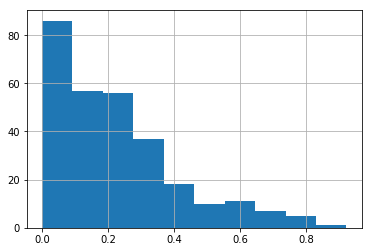

In [106]:
df.isnull().mean(axis=1).hist()

In [107]:
df = df[df.isnull().mean(axis=1) < 0.4]

In [108]:
df.shape

(247, 38)

In [109]:
df.isnull().mean(axis=0).sort_values()

Viton                           0.004049
stainless steel - 316           0.008097
Fluorocarbon (FKM)              0.008097
PTFE                            0.012146
EPDM                            0.020243
stainless steel - 304           0.020243
Buna N (Nitrile)                0.024291
Aluminum                        0.032389
Neoprene                        0.032389
PVC                             0.040486
Kalrez                          0.044534
Polypropylene                   0.048583
Natural rubber                  0.068826
Nylon                           0.085020
PVDF (Kynar)                    0.093117
Carbon Steel                    0.097166
Polyurethane                    0.101215
ChemRaz (FFKM)                  0.109312
LDPE                            0.117409
Epoxy                           0.117409
Carbon graphite                 0.121457
Hastelloy-C                     0.125506
Bronze                          0.125506
CPVC                            0.129555
Acetal (Delrin) 

In [110]:
# filter materials with limited information
df = df[df.columns[df.isnull().mean(axis=0) < 0.3]]

In [111]:
df.shape

(247, 31)

#### Vectorize!

In [112]:
#vecs = {'A': np.array([1,0,0,0,0]), 'B': (0,1,0,0,0), 'C': (0,0,1,0,0), 'D':(0,0,0,1,0), np.NaN: (0,0,0,0,1)} ##fail
labs = {'A': 0, 'B': 1, 'C': 2, 'D': 3, np.NaN: 4}

In [113]:
ser = df['Hypalon'].replace(labs)
ser.head()

chemical
acetaldehyde            2
acetamide               1
acetic acid             2
acetic acid, glacial    2
acetic anhydride        0
Name: Hypalon, dtype: int64

In [114]:
lb = preprocessing.LabelBinarizer()
lb.fit(ser)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [115]:
lb.classes_

array([0, 1, 2, 3, 4])

In [116]:
lb.transform(ser)

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ..., 
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [117]:
df['Hypalon'].head()

chemical
acetaldehyde            C
acetamide               B
acetic acid             C
acetic acid, glacial    C
acetic anhydride        A
Name: Hypalon, dtype: object

In [118]:
cols = [lb.transform(col.replace(labs)) for name, col in df.iteritems()]

In [119]:
cols[0:2]

[array([[0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        ..., 
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]]), array([[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ..., 
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0]])]

In [141]:
print(np.stack(cols, axis=1).shape)
nx0, nx1, nx2 = np.stack(cols, axis=1).shape

(247, 31, 5)


In [121]:
ary = np.concatenate(cols, axis=1)
ary = ary.astype(float)
ary.shape

(247, 155)

In [122]:
ts = TSNE(2, perplexity=30, n_iter=2000)
x_em = ts.fit_transform(ary)

In [123]:
def tsne_plot(embedAry, labels=None):
    scatter(embedAry[:,0], embedAry[:,1], c=labels)

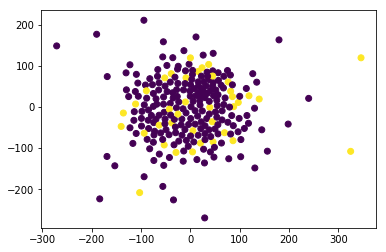

In [124]:
tsne_plot(x_em, labels=df.index.str.contains('acid'))

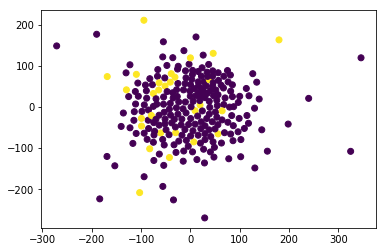

In [125]:
tsne_plot(x_em, labels=df.index.str.contains('ol'))

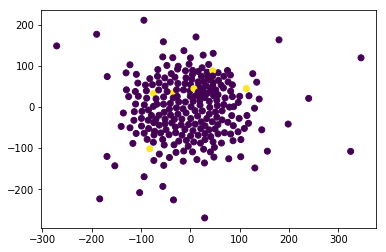

In [126]:
tsne_plot(x_em, labels=df.index.str.contains('butyl'))

I reckon since the compat chart contains a combination of alkane/fatty alcohols/acids, along with the hydrophilic ones, the spread of that group is large

In [127]:
def vdist(vec, ary):
    return np.sum((ary-vec)**2, axis=1)**0.5

In [128]:
v_ethanol = ary[df.index.str.contains('ethyl alcohol')][0]
ary.shape, v_ethanol.shape

((247, 155), (155,))

In [129]:
(ary**2 - v_ethanol**2).shape

(247, 155)

In [130]:
#vdist(v_ethanol, ary)

In [131]:
ethanolDist = pd.Series(vdist(v_ethanol, ary), index=df.index)
ethanolDist.sort_values()

chemical
ethyl alcohol             0.000000
ethanol                   1.414214
butyl alcohol             3.464102
isobutyl alcohol          4.242641
sodium carbonate          4.472136
diethylene glycol         4.472136
glycerin                  4.472136
amyl alcohol              4.472136
amyl alcohol              4.690416
propyl alcohol            4.690416
diethylamine              4.690416
glucose                   4.898979
calcium carbonate         4.898979
potassium iodide          4.898979
sodium cyanide            5.099020
butane                    5.099020
ammonium nitrate          5.099020
propylene glycol          5.099020
gelatin                   5.099020
sodium bicarbonate        5.099020
calcium nitrate           5.099020
potassium permanganate    5.099020
molasses                  5.099020
manganese sulfate         5.291503
salicylic acid            5.291503
mercury                   5.291503
potassium chloride        5.291503
barium chloride           5.291503
potassium s

In [132]:
ethanolDist['methyl alcohol']

5.6568542494923806

## proof of concept: not bad
though there is probably a lot of noise due to the sheer number of blanks. they definitely goof with the distance

In [133]:
df.isnull().mean().mean()

0.097557790257280924

In [134]:
ary[:,:].shape

(247, 155)

In [135]:
df.iloc[50:55]

,Hypalon,PVC,LDPE,Kalrez,Viton,CPVC,Fluorocarbon (FKM),Copper,PTFE,Tygon,...,Natural rubber,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene
chemical,,,,,,,,,,,,,,,,,,,,,
benzoic acid,D,A,A,A,A,A,A,NaN,A,A,...,D,A,B,D,B,B,B,D,B,B
benzol,D,NaN,C,A,A,NaN,B,B,A,C,...,D,A,A,D,A,A,D,D,D,B
benzyl chloride,D,NaN,NaN,A,A,NaN,A,D,NaN,NaN,...,D,A,A,D,B,D,D,D,D,C
boric acid,A,A,A,A,A,A,A,B,A,A,...,A,A,A,A,A,B,A,A,D,A
bromine,D,C,D,A,A,D,A,NaN,A,B,...,D,D,D,D,D,D,D,D,D,D


In [136]:
# mask off the nans
ary[52][4::5]

array([ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [142]:
ary.reshape(-1, nx1, nx2)[52]

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  

In [143]:
ary2 = ary.reshape(-1, nx1, nx2)
print(ary2.shape)
ary2 = ary2[:, :, :4]
print(ary2.shape)
ary2 = ary2.reshape(-1, nx1*4)
ary2.shape

(247, 31, 5)
(247, 31, 4)


(247, 124)

In [144]:
ts = TSNE(2, perplexity=30, n_iter=2000)
x_em = ts.fit_transform(ary2)

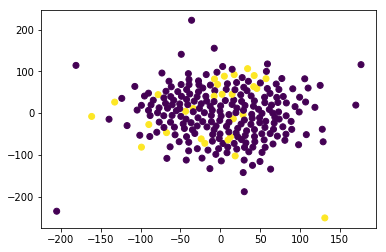

In [145]:
tsne_plot(x_em, labels=df.index.str.contains('ol'))

In [146]:
v_ethanol = ary2[df.index.str.contains('ethyl alcohol')][0]

ethanolDist = pd.Series(vdist(v_ethanol, ary2), index=df.index)
ethanolDist.sort_values()

chemical
ethyl alcohol             0.000000
ethanol                   1.414214
butyl alcohol             3.316625
isobutyl alcohol          4.000000
diethylene glycol         4.123106
potassium iodide          4.242641
glycerin                  4.358899
amyl alcohol              4.358899
sodium carbonate          4.358899
calcium carbonate         4.472136
molasses                  4.582576
propyl alcohol            4.582576
amyl alcohol              4.582576
diethylamine              4.582576
salicylic acid            4.690416
glucose                   4.690416
potassium permanganate    4.795832
calcium nitrate           4.898979
phthalic acid             4.898979
butane                    4.898979
sodium cyanide            4.898979
barium cyanide            4.898979
sodium metasilicate       4.898979
manganese sulfate         4.898979
propylene glycol          4.898979
silicone                  4.898979
glycolic acid             4.898979
hydrogen gas              4.898979
ammonium ni

### bummer. 
## oh wait
#### it's not really a valid comparison
since the set of chemicals with nans in a given category complements the filled values, dropping the nan label column is only trivially effective. 

yeay data category balancing...
what we need here is a fuzzy embedding based on material compatibility. Sounds like a job for neural networks, or perhaps markov chains.


In [147]:
df[df.index.str.contains('ol')]

,Hypalon,PVC,LDPE,Kalrez,Viton,CPVC,Fluorocarbon (FKM),Copper,PTFE,Tygon,...,Natural rubber,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene
chemical,,,,,,,,,,,,,,,,,,,,,
amyl alcohol,A,A,B,A,A,A,A,A,A,D,...,B,A,A,A,A,A,D,D,A,B
benzyl alcohol,C,D,D,NaN,A,A,A,B,A,D,...,D,NaN,A,B,B,A,NaN,D,C,A
butyl alcohol,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,B,D,A,A
diacetone alcohol,D,B,B,A,D,NaN,D,NaN,A,B,...,D,A,A,A,A,A,D,D,D,B
ethyl alcohol,A,C,B,A,A,B,A,A,A,C,...,A,A,A,A,A,A,B,D,A,A
hexyl alcohol,B,A,A,A,C,NaN,B,NaN,A,A,...,A,NaN,A,C,A,A,B,D,A,NaN
isobutyl alcohol,A,A,A,A,A,NaN,A,NaN,A,A,...,A,A,A,A,A,A,A,D,A,A
isopropyl alcohol,A,A,A,A,A,C,A,B,A,A,...,A,A,A,A,B,A,A,D,B,A
methyl alcohol,A,A,A,A,C,A,C,B,A,A,...,A,A,A,A,A,A,A,D,A,A


In [148]:
ary.shape

(247, 155)

In [149]:
ary_mat = ary.reshape(-1, nx1, nx2)
ary_mat = ary_mat.swapaxes(0, 1)
ary_mat = ary_mat.reshape(nx1, -1)
ary_mat.shape

(31, 1235)

In [150]:
ts = TSNE(2, perplexity=30, n_iter=2000)
y_em = ts.fit_transform(ary_mat.T)

In [151]:
y_em.shape

(1235, 2)

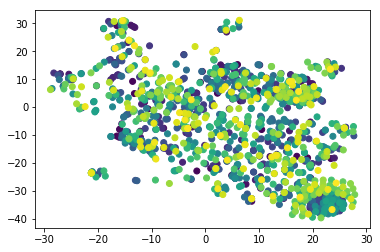

In [152]:
tsne_plot(y_em, labels=np.arange(len(y_em)))

that's totally not what I meant to do, but it's cool, and has some signs of clusters, so I am leaving it for now

In [153]:
ts = TSNE(2, perplexity=30, n_iter=2000)
y_em = ts.fit_transform(ary_mat)
y_em.shape

(31, 2)

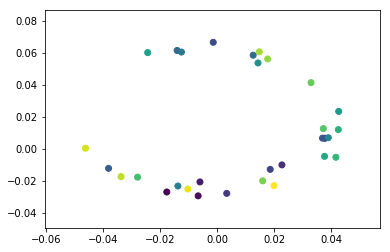

In [154]:
tsne_plot(y_em, labels=np.arange(len(y_em)))

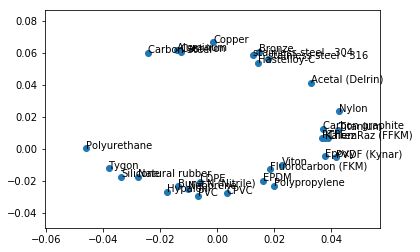

In [155]:
fig, ax = plt.subplots()
ax.scatter(y_em[:,0], y_em[:,1])

for i, txt in enumerate(df.columns):
    ax.annotate(txt, (y_em[i,0], y_em[i,1]))
#     print(i, txt)
rcParams['figure.figsize'] = 15,7


In [156]:
pca = PCA(2)
y_em = pca.fit_transform(ary_mat)
y_em = preprocessing.normalize(y_em, axis=0)

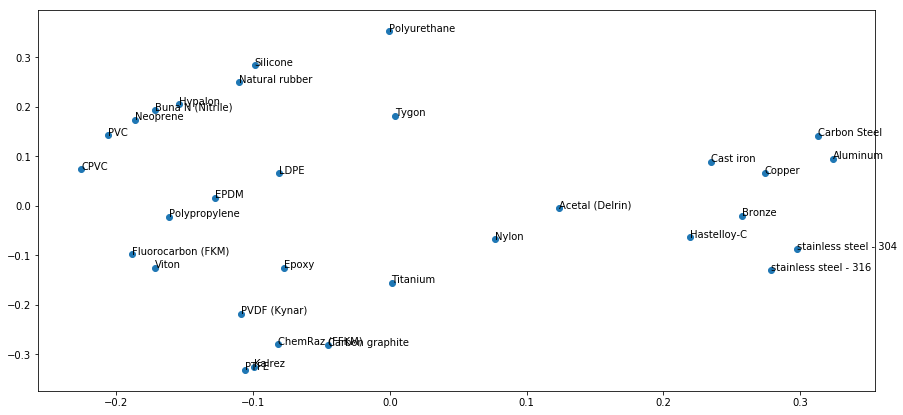

In [157]:
fig, ax = plt.subplots()
ax.scatter(y_em[:,0], y_em[:,1])

for i, txt in enumerate(df.columns):
    ax.annotate(txt, (y_em[i,0], y_em[i,1]))
#     print(i, txt)
rcParams['figure.figsize'] = 15,7

hey, not too shabby!

what if we map (exc, good, n/a, fair, poor) to (1, .5, 0, -.5, -1) and use that to weight the material eigenvector, then accumulate? that should give an embedding in ndim (same dim as mat eigenvec) where N/A's have no weight. 


In [158]:
y_em.shape

(31, 2)

In [159]:
n = 3
print(df.columns[n])
print(y_em[n])

Kalrez
[-0.09977464 -0.32486869]


In [160]:
subval = 0.5
valmap = {'A':1, 'B': subval, np.nan:0, 'C': -subval, 'D': -1 }
vec = df.iloc[0].replace(valmap)
vec.shape

(31,)

In [161]:
assert vec.shape[0] == y_em.shape[0]

In [162]:
accu = 0.0
for i, eig in enumerate(y_em):
    accu += eig * vec[i]
accu

array([ 1.68751678, -2.02186468])

In [163]:
vec.as_matrix().reshape(1, -1) @ y_em

array([[ 1.68751678, -2.02186468]])

In [164]:
newary = df.replace(valmap).as_matrix()
newary.shape

(247, 31)

In [165]:
newembed = newary @ y_em
newembed.shape

(247, 2)

In [166]:
def scatter_label(xy, labels, color=None):
    ax = plt.axes()
    ax.scatter(xy[:,0], xy[:,1])

    for i, txt in enumerate(labels):
        ax.annotate(txt, (xy[i,0], xy[i,1]), color=color)

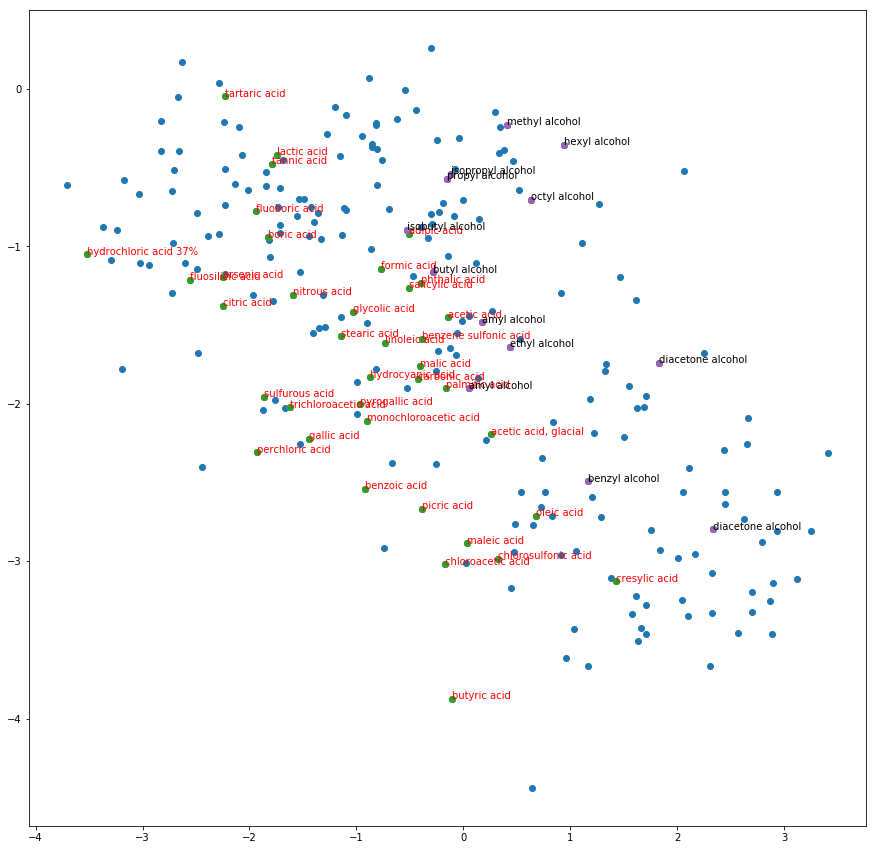

In [167]:
rcParams['figure.figsize'] = 15,15
# tsne_plot(newembed, labels=df.index.str.contains('ol'))
tsne_plot(newembed)
mask = labels=df.index.str.contains('acid')
tsne_plot(newembed[mask] )
scatter_label(newembed[mask], df.index[mask], color='red')
mask = labels=df.index.str.contains('alcohol')
tsne_plot(newembed[mask] )
scatter_label(newembed[mask], df.index[mask], color='k')

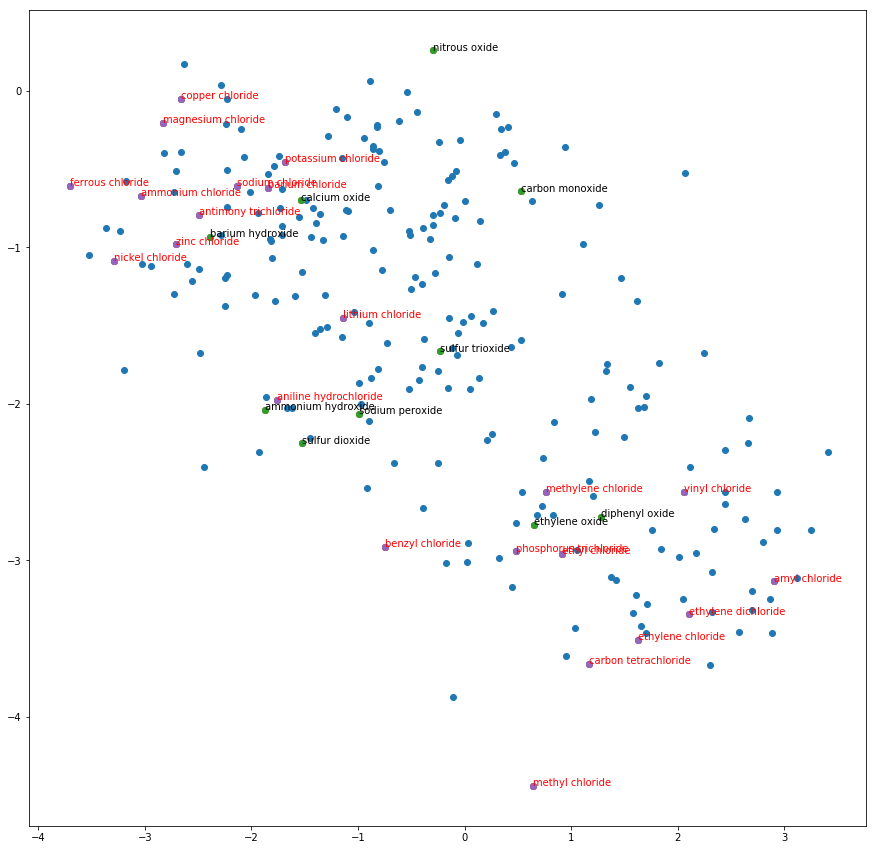

In [168]:
rcParams['figure.figsize'] = 15,15
# tsne_plot(newembed, labels=df.index.str.contains('ol'))
tsne_plot(newembed)
mask = labels=df.index.str.contains('oxide')
tsne_plot(newembed[mask] )
scatter_label(newembed[mask], df.index[mask], color='k')
mask = labels=df.index.str.contains('chloride')
tsne_plot(newembed[mask] )
scatter_label(newembed[mask], df.index[mask], color='red')